#Project Module 5: Interpolation
#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

#Introduction

This project aims to show the difference between direct linear interpolation and linear spline interpolation. To demonstrate this, we will work in the opposite direction than usual by starting with an equation that we chose. We will start with this equation, extrapolate points from it, and then continue with direct linear interpolation and linear spline interpolation to determine each method's accuracy and learn how each technique works. 

The next code block contains the methods from the previous week where we can use the Gauss Jordan method to assist in interpolation.

In [93]:
import matplotlib.pyplot as plt
import numpy as np
# Methods

def gJEquation(a, b, c, d):
  return a - ( b * (c / d) )

def gaussJordan(arr):

  showResults = False #@param {type:"boolean"}

  #Stage 1 Creating an upper triangular matrix
  val1 = 1

  for i in range (len(arr)):
    i_num = arr[i][i]

    for j in range (val1, len(arr)):
      j_num = arr[j][i]

      for k in range (len(arr[0])):
        arr[j][k] = gJEquation(arr[j][k], arr[i][k], j_num, i_num)

    val1 += 1

  if (showResults):
    for row in arr:
      print(row)
    print()

  #Stage 2 Transform rows for the Diagonal Matrix location values to be 1
  for i in range(len(arr)):
    i_num = arr[i][i]

    for j in range(len(arr[0])):
      arr[i][j] /= i_num
      #print(arr[i][j], i_num)

  if (showResults):
    for row in arr:
      print(row)
    print()

  #Stage 3 Transform rows to create a Diagonal Matrix
  val1 = len(arr)

  for i in range (1, len(arr)):
    i_num = arr[i][i]

    for j in range (i):
      j_num = arr[j][i]

      for k in range (len(arr[0])):
        arr[j][k] = gJEquation(arr[j][k], arr[i][k], j_num, i_num)

  val1 -= 1

  if (showResults):
    for row in arr:
      print(row)
    print()

  return arr

def sysOfEqAnswers(arr):
  tempArray = []

  gaussJordan(arr)

  for i in range(len(arr)):
    tempArray.append(arr[i][-1])

  return tempArray

Our base function is as follows.

Base:  
f(x) = x<sup>5</sup> + x<sup>4</sup> + x<sup>3</sup> - x/3<sup>2</sup> - x + 5

To use simple positive integers for x, we have transformed our base function into the following.

Transformed:  
f(x) = ((x/6) - 1.5)<sup>5</sup> + ((x/6) - 1.5)<sup>4</sup> + ((x/6) - 1.5)<sup>3</sup> - ((x/18) - 1.5)<sup>2</sup> - ((x/6) - 1.5) + 5


---

When we take the following equation and then solve for f(x), using points we chose from the x side of the table, we can solve for the right side of the table. With these points we finally have a starting place for interpolation.

f(x) = ((x/6) - 1.5)<sup>5</sup> + ((x/6) - 1.5)<sup>4</sup> + ((x/6) - 1.5)<sup>3</sup> - ((x/18) - 1.5)<sup>2</sup> - ((x/6) - 1.5) + 5

f(2) = ((2/6) - 1.5)<sup>5</sup> + ((2/6) - 1.5)<sup>4</sup> + ((2/6) - 1.5)<sup>3</sup> - ((2/18) - 1.5)<sup>2</sup> - ((2/6) - 1.5) + 5

f(2) = 1.3409207818930033


| x | f(x) |
|---------|----------|
| 2   | 1.3409207818930033  |
| 4   | 2.702289094650206  |
| 8   | 3.048482510288066  |
| 12  | 3.0243055555555554  |
| 14  | 4.107896090534981  |
| 15  | 5.555555555555555  |


#Direct Linear Interpolation

The following is the base equation we need to create a direct linear equation. We can then take this equation and create simultaneous equations to then solve for a<sub>0</sub>, a<sub>1</sub>x, and so on.

Base:  
f(x) = a<sub>0</sub> + a<sub>1</sub>x + a<sub>2</sub>x<sup>2</sup> + a<sub>3</sub>x<sup>3</sup>  

f(2) =  a<sub>0</sub> + a<sub>1</sub>(2) + a<sub>2</sub>(2)<sup>2</sup> + a<sub>3</sub>(2)<sup>3</sup> + a<sub>4</sub>(2)<sup>4</sup> + a<sub>5</sub>(2)<sup>5</sup> = 1.3409207818930033  
f(4) =  a<sub>0</sub> + a<sub>1</sub>(4) + a<sub>2</sub>(4)<sup>2</sup> + a<sub>3</sub>(4)<sup>3</sup> + a<sub>4</sub>(4)<sup>4</sup> + a<sub>5</sub>(4)<sup>5</sup> = 2.702289094650206   
f(8) =  a<sub>0</sub> + a<sub>1</sub>(8) + a<sub>2</sub>(8)<sup>2</sup> + a<sub>3</sub>(8)<sup>3</sup> + a<sub>4</sub>(8)<sup>4</sup> + a<sub>5</sub>(8)<sup>5</sup> = 3.048482510288066   
f(12) = a<sub>0</sub> + a<sub>1</sub>(12) + a<sub>2</sub>(12)<sup>2</sup> + a<sub>3</sub>(12)<sup>3</sup> + a<sub>4</sub>(12)<sup>4</sup> + a<sub>5</sub>(12)<sup>5</sup> = 3.0243055555555554  
f(14) = a<sub>0</sub> + a<sub>1</sub>(14) + a<sub>2</sub>(14)<sup>2</sup> + a<sub>3</sub>(14)<sup>3</sup> + a<sub>4</sub>(14)<sup>4</sup> + a<sub>5</sub>(14)<sup>5</sup> = 4.107896090534981   
f(15) = a<sub>0</sub> + a<sub>1</sub>(15) + a<sub>2</sub>(15)<sup>2</sup> + a<sub>3</sub>(15)<sup>3</sup> + a<sub>4</sub>(15)<sup>4</sup> + a<sub>5</sub>(15)<sup>5</sup> = 5.555555555555555   


---
Now that we have our simultaneous equations we can create a matrix based on the equations. 

$
\begin{matrix}
\left[ \begin{array}{cccc}
1 & 2 & 4 & 8 & 16 & 32\\
1 & 4 & 16 & 64 & 256 & 1024\\
1 & 8 & 64 & 512 & 4096 & 32768\\
1 & 12 & 144 & 1728 & 20736 & 248832\\
1 & 14 & 196 & 2744 & 38416 & 537824\\
1 & 15 & 225 & 3375 & 50625 & 759375\\
\end{array}
\right]
\end{matrix}
\begin{matrix}
\left[ \begin{array}{cccc}
a_0\\
a_1\\
a_2\\
a_3\\
\end{array}
\right]
\end{matrix} =
\begin{matrix}
\left[ \begin{array}{cccc}
1.3409207818930033 \\
2.702289094650206 \\
3.048482510288066 \\
3.0243055555555554 \\
4.107896090534981 \\
5.555555555555555 \\
\end{array}
\right]
\end{matrix}
$

After this, we can finally we can run our Gauss Jordan method. In the next code block, we are creating the matrix from the initial table. That matrix is carried throughout the code and is named "array1". In the proceeding code block (after the matrix creation code block) is where the sysOfEqAnswers() method is ran to find a<sub>0</sub>, a<sub>1</sub>x, and so on and then those results are used to calculate interpolated f(x) values. The results are then plotted out on a graph.

In [94]:
import numpy as np

array1 = []

fOFx_equation = "((x/6) - 1.5)**5 + ((x/6) - 1.5)**4 + ((x/6) - 1.5)**3 - ((x/18) - 1.5)**2 - ((x/6) - 1.5) + 5" #Initial equation

def f(x): # f(x) function
  return eval(fOFx_equation) # runs the string equation with input as the x

xVals = [2, 4, 8, 12, 14, 15] #x
fOFxVals = [f(xVals[0]), f(xVals[1]), f(xVals[2]), f(xVals[3]), f(xVals[4]), f(xVals[5])]#f(x)

print("Matrix:")
for i in range(6):
    row = []
    for j in range(7):
        if j < 6:
            row.append(xVals[i] ** j)
        else:
            row.append(fOFxVals[i])
    array1.append(row) # append the row to the array

    print(array1[i])

Matrix:
[1, 2, 4, 8, 16, 32, 2.3409207818930033]
[1, 4, 16, 64, 256, 1024, 3.702289094650206]
[1, 8, 64, 512, 4096, 32768, 4.048482510288066]
[1, 12, 144, 1728, 20736, 248832, 4.024305555555555]
[1, 14, 196, 2744, 38416, 537824, 5.107896090534981]
[1, 15, 225, 3375, 50625, 759375, 6.555555555555555]


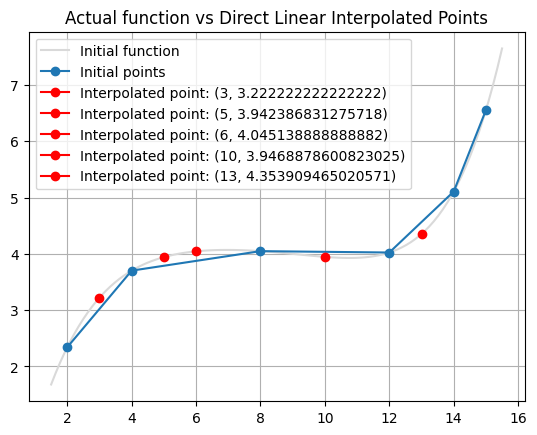

In [95]:
interpolateX = [3, 5, 6, 10, 13]
inputNum = 0

#---------------------------------------------------------------------
# Plotting

# Define the x range for the plot
x = np.linspace(1.5, 15.5, 100)

def f(x):
    return eval(fOFx_equation)

# Plot the function over the x range
plt.plot(x, f(x), '-', color="#D9D9D9", label='Initial function')


plt.plot(xVals, fOFxVals, 'o-', label='Initial points')
plt.title('Actual function vs Direct Linear Interpolated Points')


#---------------------------------------------------------------------
# Gauss Jordan to calculate the interpolatedPoint

gaussAnswers = sysOfEqAnswers(array1) #returns an array of the Gauss Jordan answers

for i in range(len(interpolateX)):
  inputNum = interpolateX[i]
  interpolatedPoint = gaussAnswers[0] + gaussAnswers[1]*inputNum + gaussAnswers[2]*inputNum**2 + gaussAnswers[3]*inputNum**3 + gaussAnswers[4]*inputNum**4 + gaussAnswers[5]*inputNum**5

  plt.plot(inputNum, interpolatedPoint, 'o-', color="red", label='Interpolated point: ({}, {})'.format(interpolateX[i], interpolatedPoint))

#---------------------------------------------------------------------

plt.legend()
plt.grid(True)
plt.show()





#Spline Linear Interpolation

Below is to show how we get the equation used for linear interpolation. It starts back at y=mx+b and then we eventually can derive points from it.

---

$
y = mx + b  
$

$
m = \frac{y_2 - y_1}{x_2 - x_1}
$

$
y = \frac{y_2 - y_1}{x_2 - x_1}x + b  
$

$
f(x) = f(x_1) + \frac{f(x_2) - f(x_1)}{x_2 - x_1}(x - x_1)
$

Below are two example points. The first point is x=15 and the second point is x=20. In the following we will interpolate x=16.

(15, 362.78), (20, 517.35)

$
f(x) = 362.78 + \frac{517.35 - 362.78}{20 - 15}(x - 15)
$

$
f(16) = 362.78 + \frac{517.35 - 362.78}{20 - 15}(16 - 15)
$

$
f(16) = 393.7
$

In the following code, we are met with the function "splineLinInterp()". This method takes five parameters, in order they are: x<sub>1</sub>, f(x)<sub>1</sub>, x<sub>2</sub>, f(x)<sub>2</sub>, and the x value that interpolation is desired of. The method will then return the interpolated value, ready to be plotted.

6.193640689300412


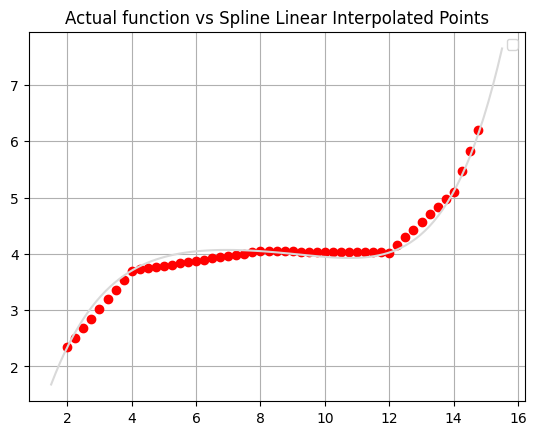

In [96]:

def splineLinInterp(x1, fOFx1, x2, fOFx2, x):
  return( fOFx1 + ( (fOFx2 - fOFx1) / (x2 - x1) ) * (x - x1) )

for i in range(60): #used to plot tons of points
  inputNum = i*.25
  for i in range(len(xVals)-1):
    if (xVals[i] <= inputNum and xVals[i+1] >= inputNum):
      result = splineLinInterp(xVals[i], fOFxVals[i], xVals[i+1], fOFxVals[i+1], inputNum) #spline linear interpolation
      plt.plot(inputNum, result, 'ro') # 'ro' for red circles
      break

print(result)

#----------------------------------------------------------------

# Define the x range for the plot
x = np.linspace(1.5, 15.5, 100)
# Plot the function over the x range
plt.plot(x, f(x), color="#D9D9D9")

plt.title('Actual function vs Spline Linear Interpolated Points')
plt.legend()
plt.grid(True)
plt.show()

#Conclusion
We found that direct linear interpolation is used to follow a potential curve, while linear interpolation is used to follow direct lines. We have concluded that while direct linear interpolation may follow a curve well, it needs to have a function backing it, which may not be accurate to all of the data, so it must be used in that case. However, linear spline interpolation does not follow a function and connects a given point to a given point. While this may not be precisely accurate, the closer the given points are to each other, the lower the potential error.

In the case of a point falling outside our data range, direct linear interpolation is an appropriate way to approximate data because of the function's predictability. However, the data may be less predictable, so there could be a significant error. When it comes to linear spline interpolation and predicting data outside of the data range, it is not feasible to interpolate those values. Spline linear interpolation is specifically based on what is in between given points that may not have a predictable function backing the interpolation. Therefore, direct linear interpolation is sometimes appropriate for out-of-range data, and linear spline interpolation is not suitable for out-of-range data.